In [1]:
#Importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_curve,r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve , roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [3]:
data = pd.read_csv(r"loan prediction.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.shape

(614, 13)

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#Dropping loan_id column
data.drop(['Loan_ID'],inplace=True,axis=1)

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


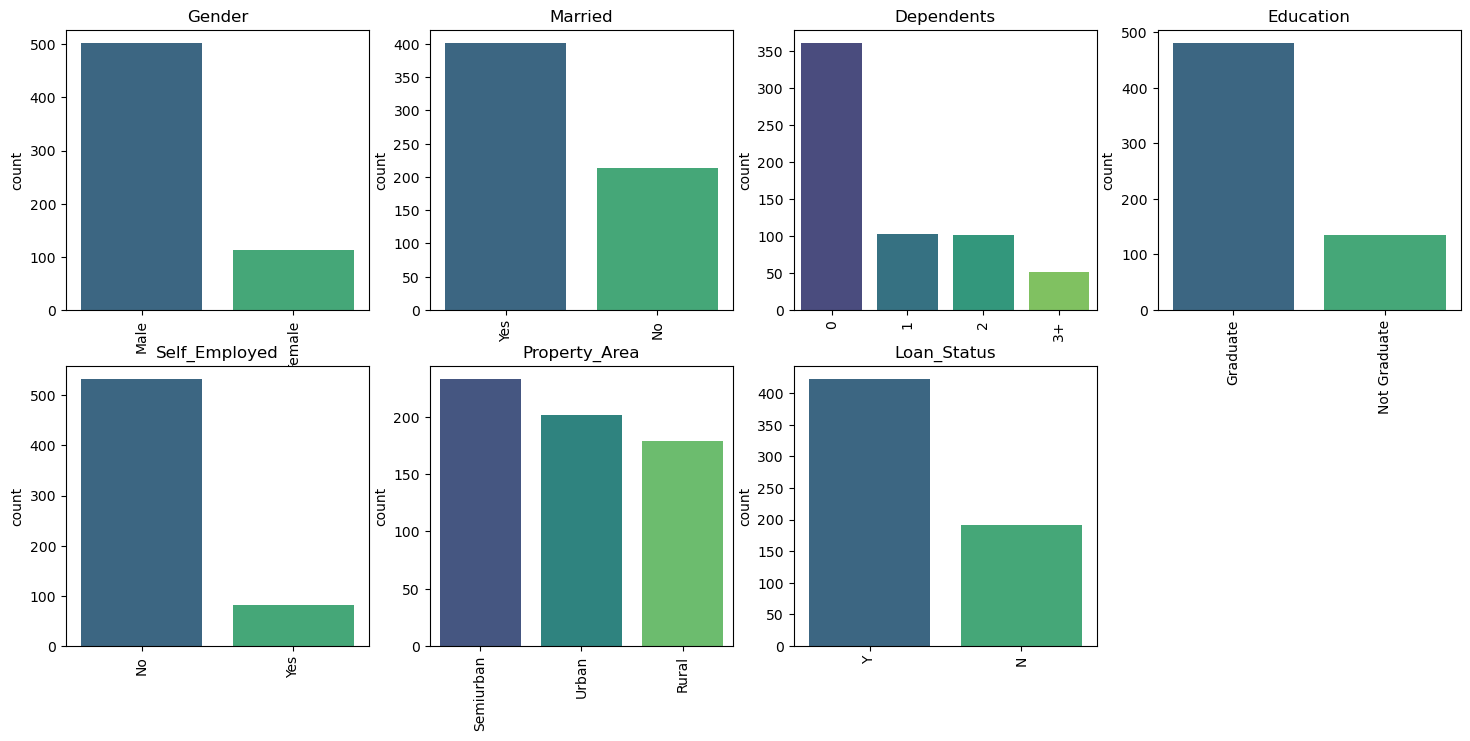

In [15]:
#To Visualize all the unique values in columns using barplot, this will simply show which value is dominating as per our dataset.
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
n_cols = 4
n_rows = (len(object_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(18, n_rows * 4))

for index, col in enumerate(object_cols):
    y = data[col].value_counts()
    colors = sns.color_palette("viridis", len(y))  # Use a colormap with different colors for each bar
    
    plt.subplot(n_rows, n_cols, index + 1)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, palette=colors)
    plt.title(col)

In [16]:
#As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = le.fit_transform(data[col])

<Axes: >

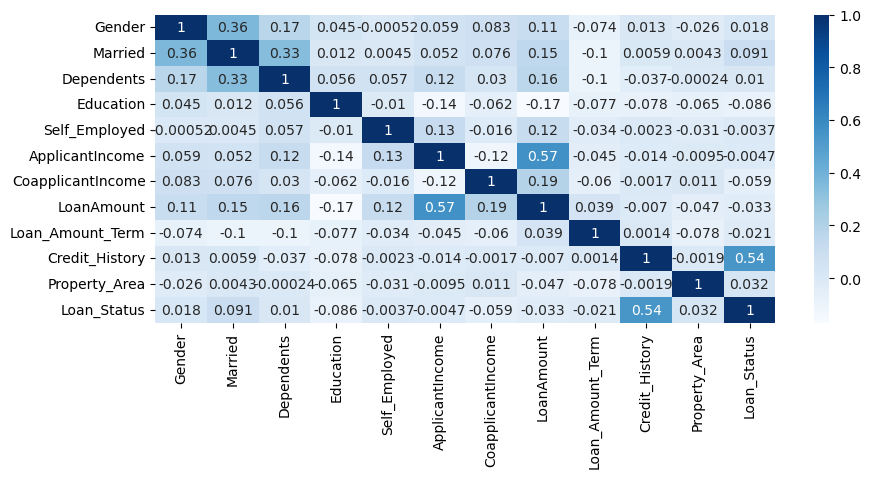

In [17]:
#Let's plot heatmap
plt.figure(figsize=(10,4))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)

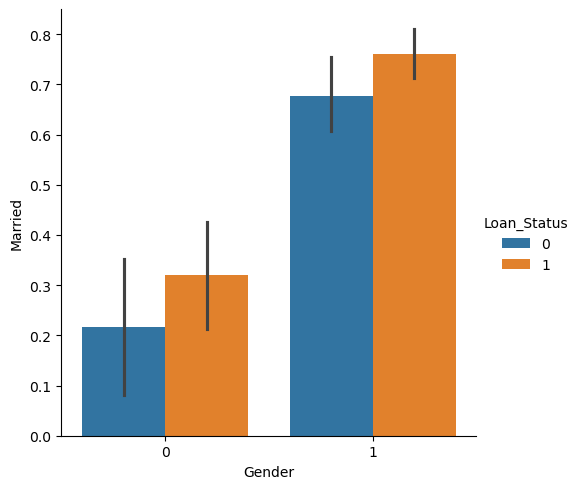

In [18]:
#The above heatmap is showing the correlation between Loan Amount and ApplicantIncome & also  Credit_History has a high impact on Loan_Status.
#Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

sns.catplot(x='Gender', y='Married', hue='Loan_Status', kind='bar', data=data)

In [19]:
X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

In [21]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

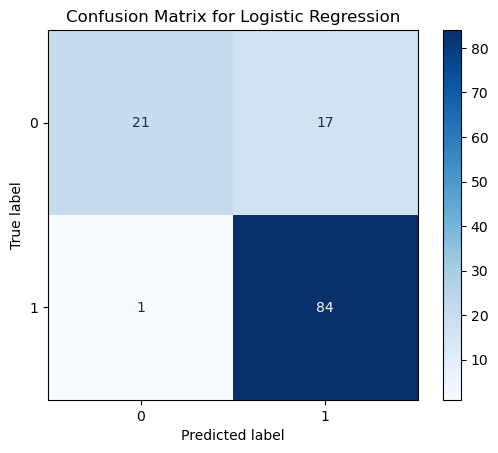

,train_set,test_set
Accuracy,0.798371,0.853659
Precision,0.780660,0.831683
Recall,0.982196,0.988235
f1,0.869908,0.903226


In [24]:
# 1.Logistic regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
LR_model = LogisticRegression() 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


train_val(y_train, y_train_pred, y_test, y_pred)

In [25]:
#  Modelling Logistic Regression (LR) with Best Parameters Using GridSeachCV
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [26]:
LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [27]:
LR_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

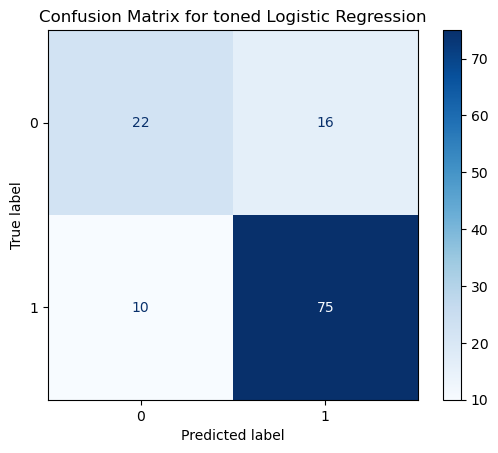

,train_set,test_set
Accuracy,0.780041,0.788618
Precision,0.792839,0.824176
Recall,0.919881,0.882353
f1,0.851648,0.852273


In [28]:
y_pred = LR_grid_model.predict(X_test_scaled)
y_train_pred = LR_grid_model.predict(X_train_scaled)

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_acc = accuracy_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for tuned Logistic Regression')
plt.show()


#plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

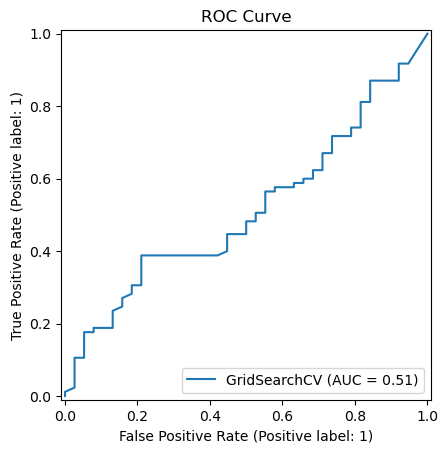

In [29]:
#Curves
roc_display = RocCurveDisplay.from_estimator(LR_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()

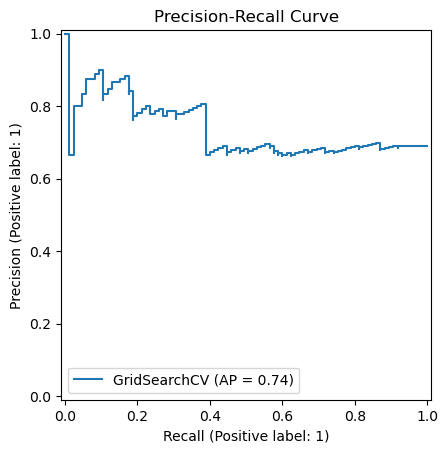

In [30]:
pr_display = PrecisionRecallDisplay.from_estimator(LR_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

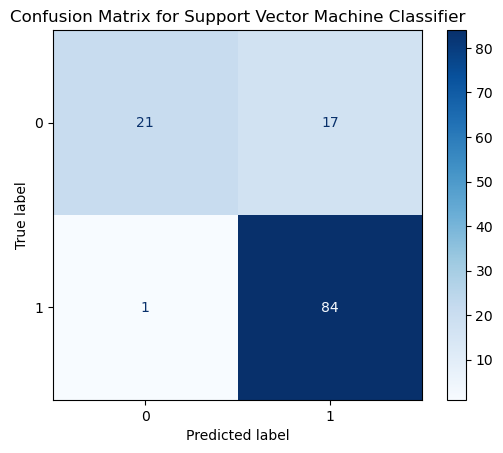

,train_set,test_set
Accuracy,0.800407,0.853659
Precision,0.782506,0.831683
Recall,0.982196,0.988235
f1,0.871053,0.903226


In [31]:
#2. Support Vector Machine (SVM)
SVM_model = SVC(random_state=42)
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)
y_train_pred = SVM_model.predict(X_train_scaled)

svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

train_val(y_train, y_train_pred, y_test, y_pred)


In [32]:
#Modelling Support Vector Machine (SVM) with Best Parameters Using GridSeachCV
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [33]:
SVM_grid_model = SVC(random_state=42)

SVM_grid_model = GridSearchCV(SVM_grid_model, param_grid, verbose=3, refit=True)

In [34]:
SVM_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.798 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.786 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.786 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.776 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.786 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.798 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.806 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.816 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.786 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.786 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [35]:
SVM_grid_model.best_estimator_

SVC(C=0.1, kernel='linear', random_state=42)

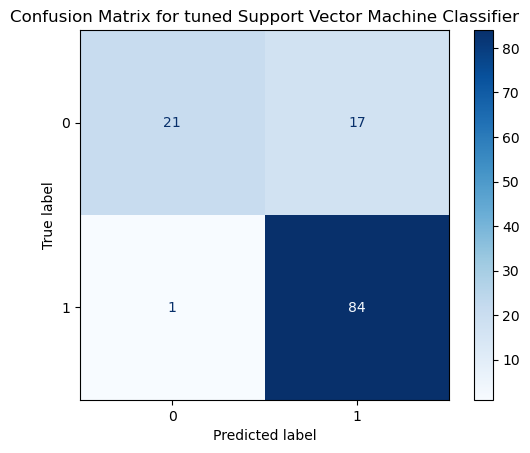

,train_set,test_set
Accuracy,0.798371,0.853659
Precision,0.780660,0.831683
Recall,0.982196,0.988235
f1,0.869908,0.903226


In [36]:
y_pred = SVM_grid_model.predict(X_test_scaled)
y_train_pred = SVM_grid_model.predict(X_train_scaled)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for tuned Support Vector Machine Classifier')
plt.show()




train_val(y_train, y_train_pred, y_test, y_pred)

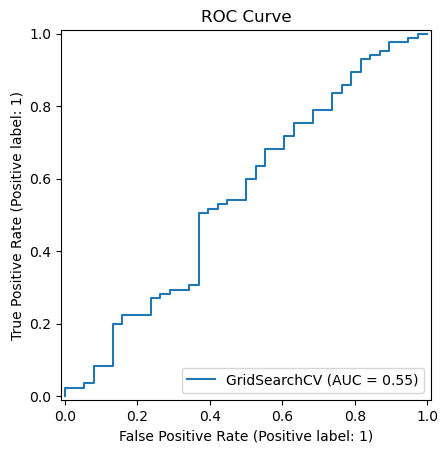

In [37]:
#Curves
roc_display = RocCurveDisplay.from_estimator(SVM_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()

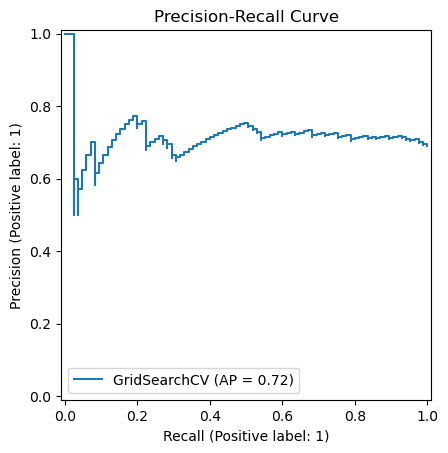

In [38]:
pr_display = PrecisionRecallDisplay.from_estimator(SVM_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

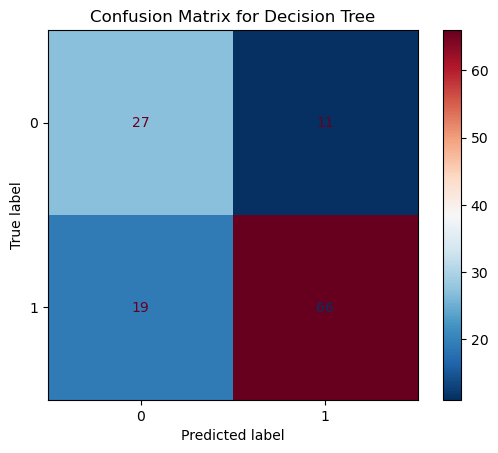

,train_set,test_set
Accuracy,1.0,0.756098
Precision,1.0,0.857143
Recall,1.0,0.776471
f1,1.0,0.814815


In [39]:
#3. Decision Tree
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot(cmap=plt.cm.RdBu_r)
plt.title('Confusion Matrix for Decision Tree')
plt.show()



train_val(y_train, y_train_pred, y_test, y_pred)

In [40]:
#  Modelling Decision Tree (DT) with Best Parameters Using GridSeachCV
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [41]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [42]:
DT_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=3,
                       min_samples_leaf=2, min_samples_split=7, random_state=42,
                       splitter='random')

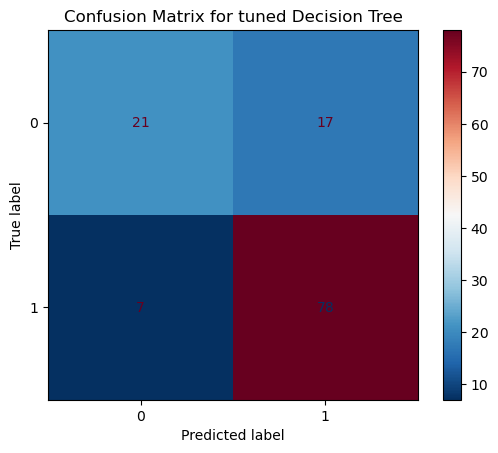

,train_set,test_set
Accuracy,0.796334,0.804878
Precision,0.791155,0.821053
Recall,0.955490,0.917647
f1,0.865591,0.866667


In [43]:
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot(cmap=plt.cm.RdBu_r)
plt.title('Confusion Matrix for tuned Decision Tree')
plt.show()

train_val(y_train, y_train_pred, y_test, y_pred)

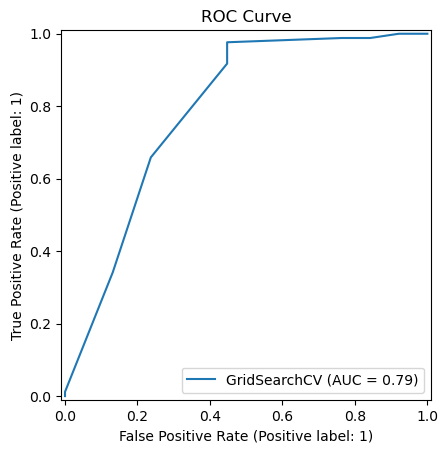

In [44]:
roc_display = RocCurveDisplay.from_estimator(DT_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()

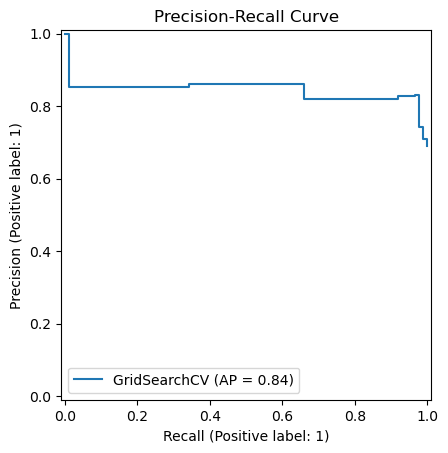

In [45]:
pr_display = PrecisionRecallDisplay.from_estimator(DT_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

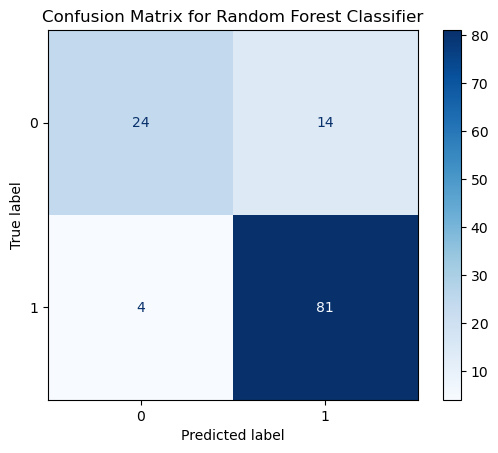

,train_set,test_set
Accuracy,1.0,0.853659
Precision,1.0,0.852632
Recall,1.0,0.952941
f1,1.0,0.900000


In [46]:
# 4. Random Forest
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

train_val(y_train, y_train_pred, y_test, y_pred)

In [47]:
param_grid = {'n_estimators':[50, 100, 300],'max_features':[2, 3, 4], 'max_depth':[3, 5, 7, 9],'min_samples_split':[2, 5, 8]}
RF_grid_model = RandomForestClassifier(random_state=101)
RF_grid_model = GridSearchCV(estimator=RF_grid_model,  param_grid=param_grid, scoring = "recall",  n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [48]:
RF_grid_model = RandomForestClassifier(random_state=101)

RF_grid_model = GridSearchCV(estimator=RF_grid_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [49]:
RF_grid_model.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=8,
                       n_estimators=50, random_state=101)

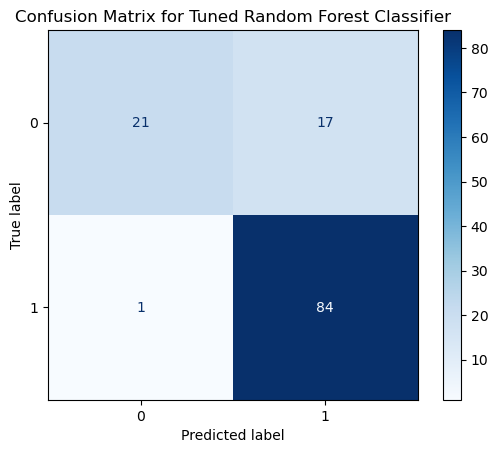

,train_set,test_set
Accuracy,0.806517,0.853659
Precision,0.785377,0.831683
Recall,0.988131,0.988235
f1,0.875164,0.903226


In [50]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)

rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_grid_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Random Forest Classifier')
plt.show()

train_val(y_train, y_train_pred, y_test, y_pred)

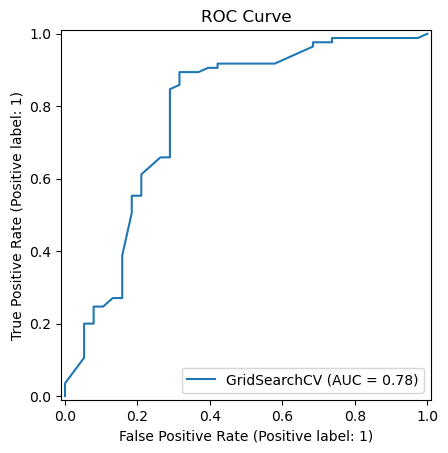

In [51]:
#Curves
roc_display = RocCurveDisplay.from_estimator(RF_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()

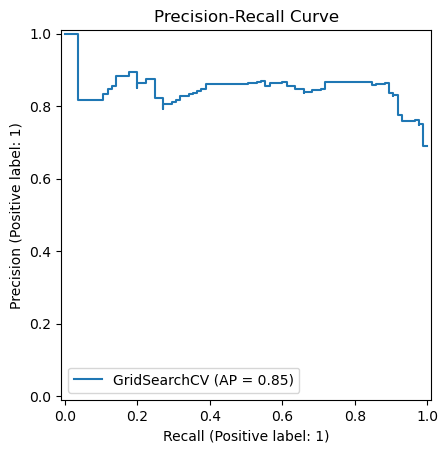

In [52]:
pr_display = PrecisionRecallDisplay.from_estimator(RF_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

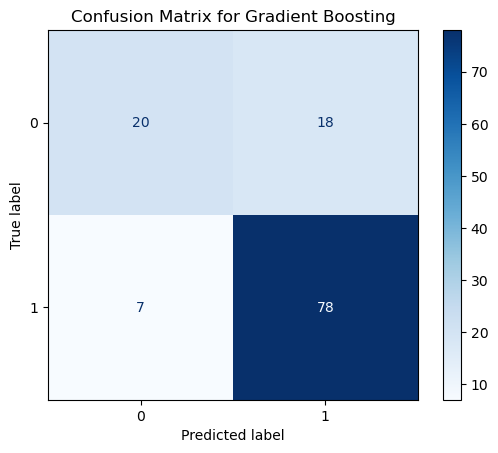

,train_set,test_set
Accuracy,0.904277,0.796748
Precision,0.877604,0.812500
Recall,1.000000,0.917647
f1,0.934813,0.861878


In [53]:
#5 Gradient Boosting
GB_model = GradientBoostingClassifier(random_state=42)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
y_train_pred = GB_model.predict(X_train)

gb_f1 = f1_score(y_test, y_pred)
gb_acc = accuracy_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)
 
    
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GB_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

train_val(y_train, y_train_pred, y_test, y_pred)

In [54]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}  # 'max_depth':[3,4,5,6]

In [58]:
GB_grid_model = GradientBoostingClassifier(random_state=42)

GB_grid_model = GridSearchCV(GB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


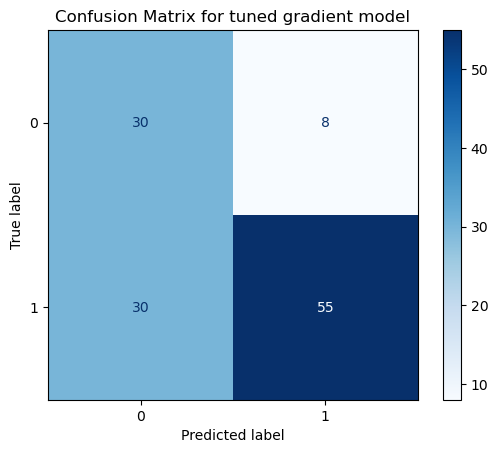

,train_set,test_set
Accuracy,0.608961,0.691057
Precision,0.831050,0.873016
Recall,0.540059,0.647059
f1,0.654676,0.743243


In [59]:
y_pred = GB_grid_model.predict(X_test_scaled)
y_train_pred = GB_grid_model.predict(X_train_scaled)

gb_grid_f1 = f1_score(y_test, y_pred)
gb_grid_acc = accuracy_score(y_test, y_pred)
gb_grid_recall = recall_score(y_test, y_pred)
gb_grid_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GB_grid_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for tuned gradient model')
plt.show()



train_val(y_train, y_train_pred, y_test, y_pred)

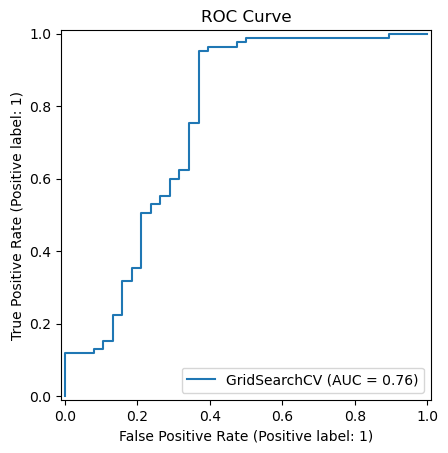

In [60]:
#Curves
roc_display = RocCurveDisplay.from_estimator(GB_grid_model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()

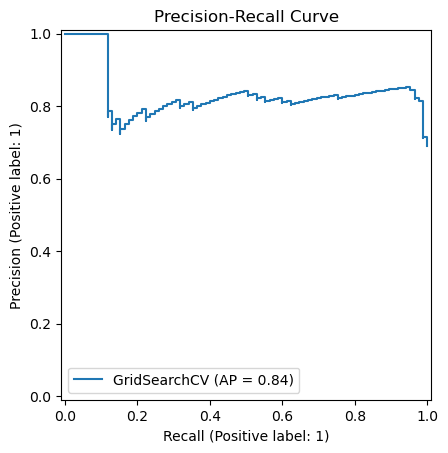

In [61]:
pr_display = PrecisionRecallDisplay.from_estimator(GB_grid_model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

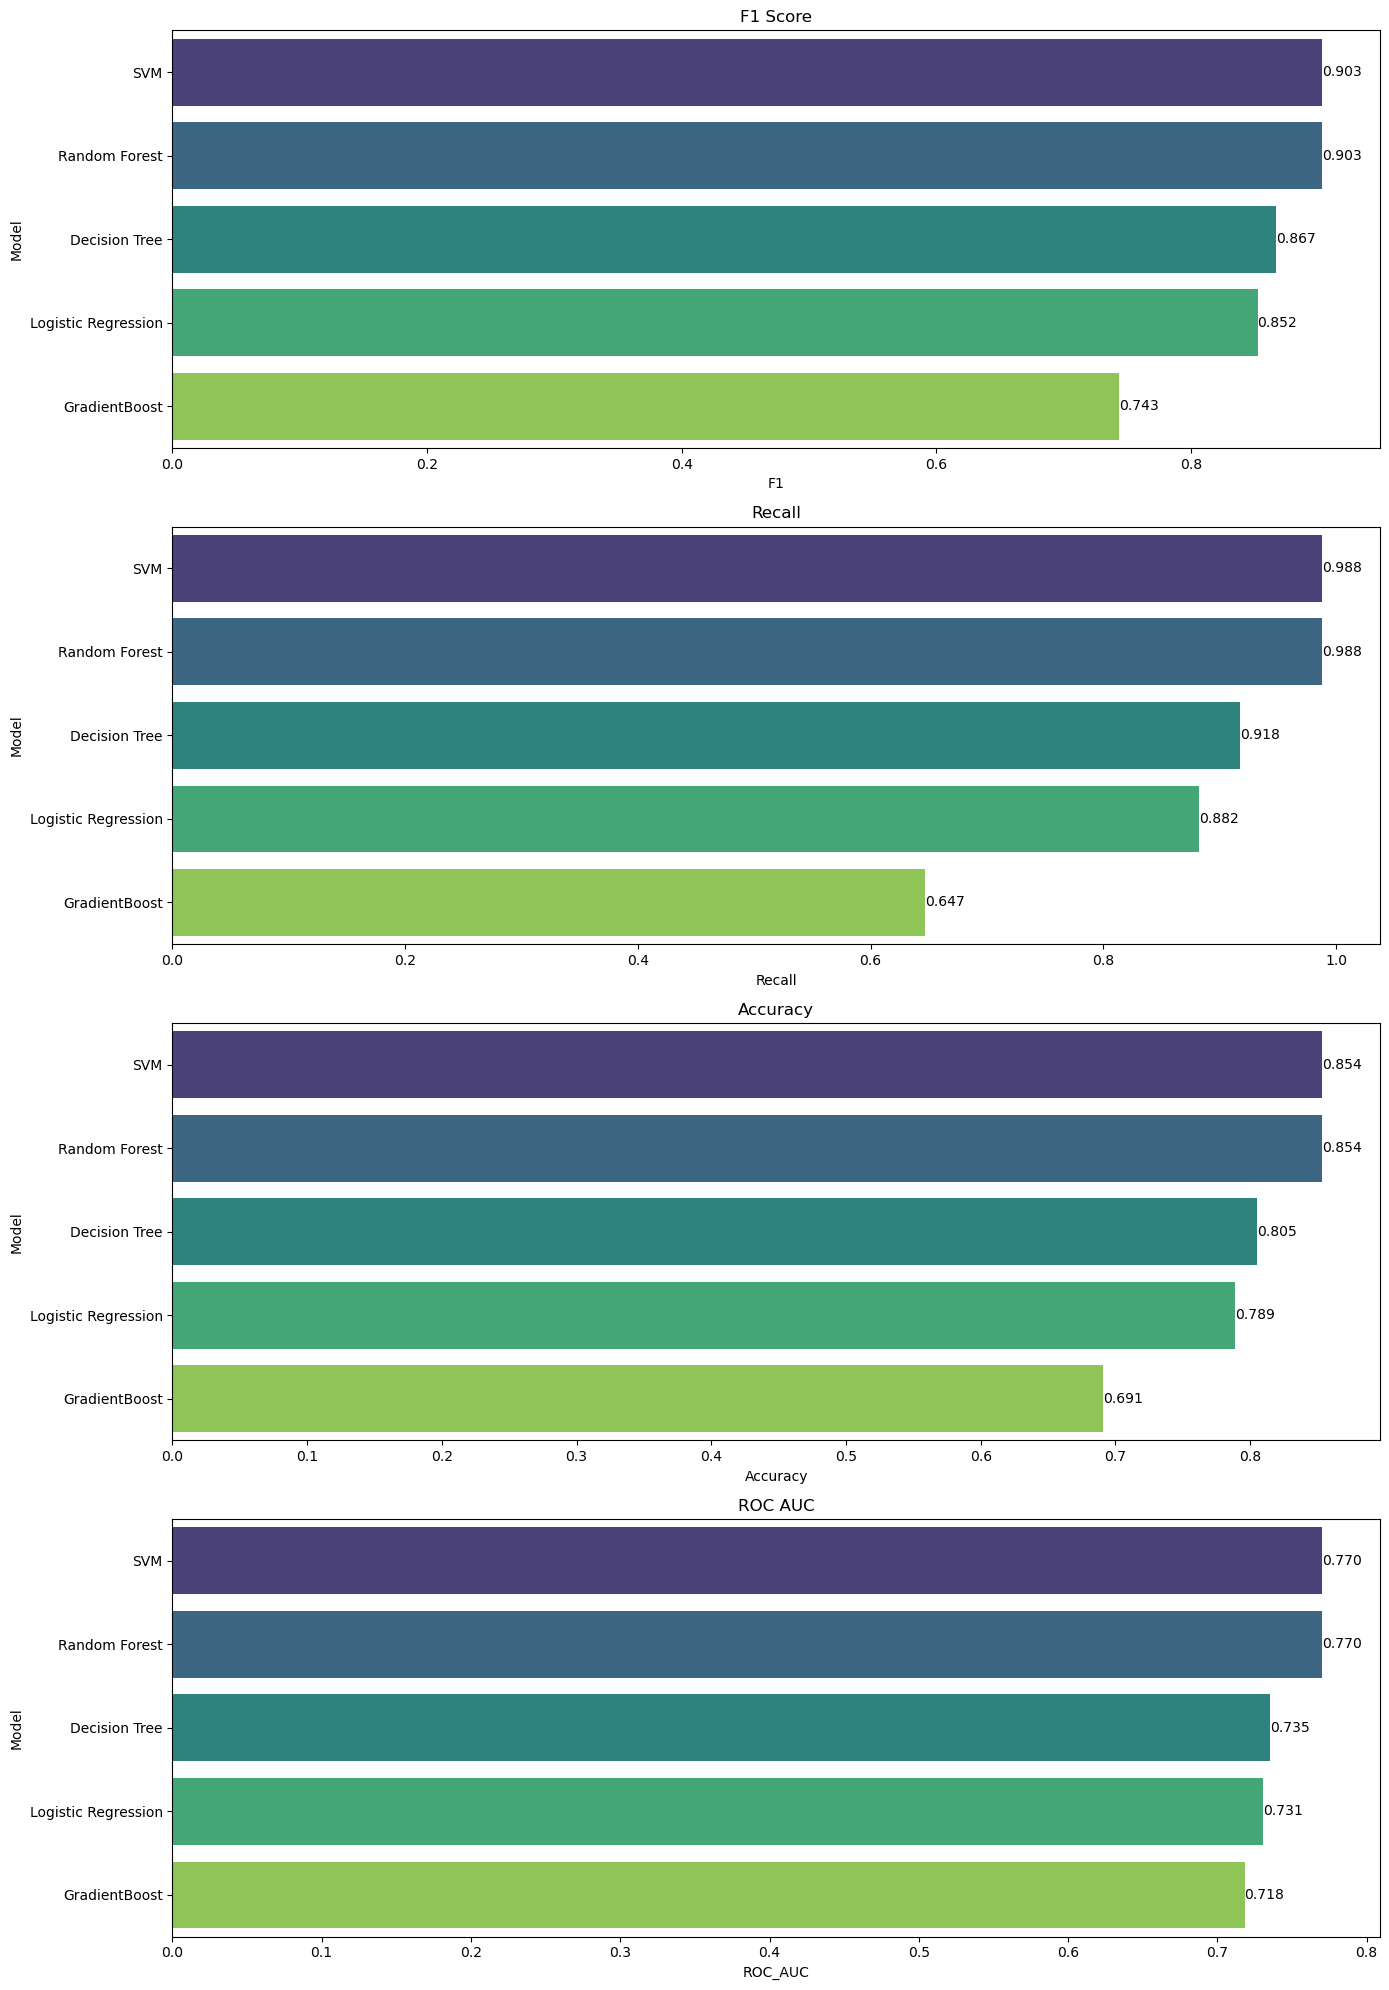

In [62]:

compare = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "GradientBoost"],
    "F1": [log_grid_f1, svm_grid_f1, dt_grid_f1, rf_grid_f1,gb_grid_f1],
    "Recall": [log_grid_recall, svm_grid_recall, dt_grid_recall, rf_grid_recall,gb_grid_recall],
    "Accuracy": [log_grid_acc, svm_grid_acc, dt_grid_acc, rf_grid_acc,gb_grid_acc],
    "ROC_AUC": [log_grid_auc, svm_grid_auc, dt_grid_auc, rf_grid_auc,gb_grid_auc]
})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2,
                '{:1.3f}'.format(width),
                ha='left',
                va='center')

plt.figure(figsize=(14, 20))

# Define a color palette
palette = sns.color_palette("viridis", len(compare))

# F1 Score plot
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('F1 Score')

# Recall plot
plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('Recall')

# Accuracy plot
plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('Accuracy')

# ROC_AUC plot
plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax = sns.barplot(x="ROC_AUC", y="Model", data=compare, palette=palette)
labels(ax)
plt.title('ROC AUC')

plt.tight_layout()
plt.show()



In [63]:
#As we can see that the tuned random forest gives the most accurate result
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(RF_grid_model, pickle_out)
pickle_out.close()